In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing included dataset in seaborn

In [9]:
url='https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data=pd.read_csv(url)
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## cleaning and subsetting data

In [10]:
subset=data[data['species']=='Chinstrap']
subset

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
276,277,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007
277,278,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007
278,279,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male,2007
279,280,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007
280,281,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


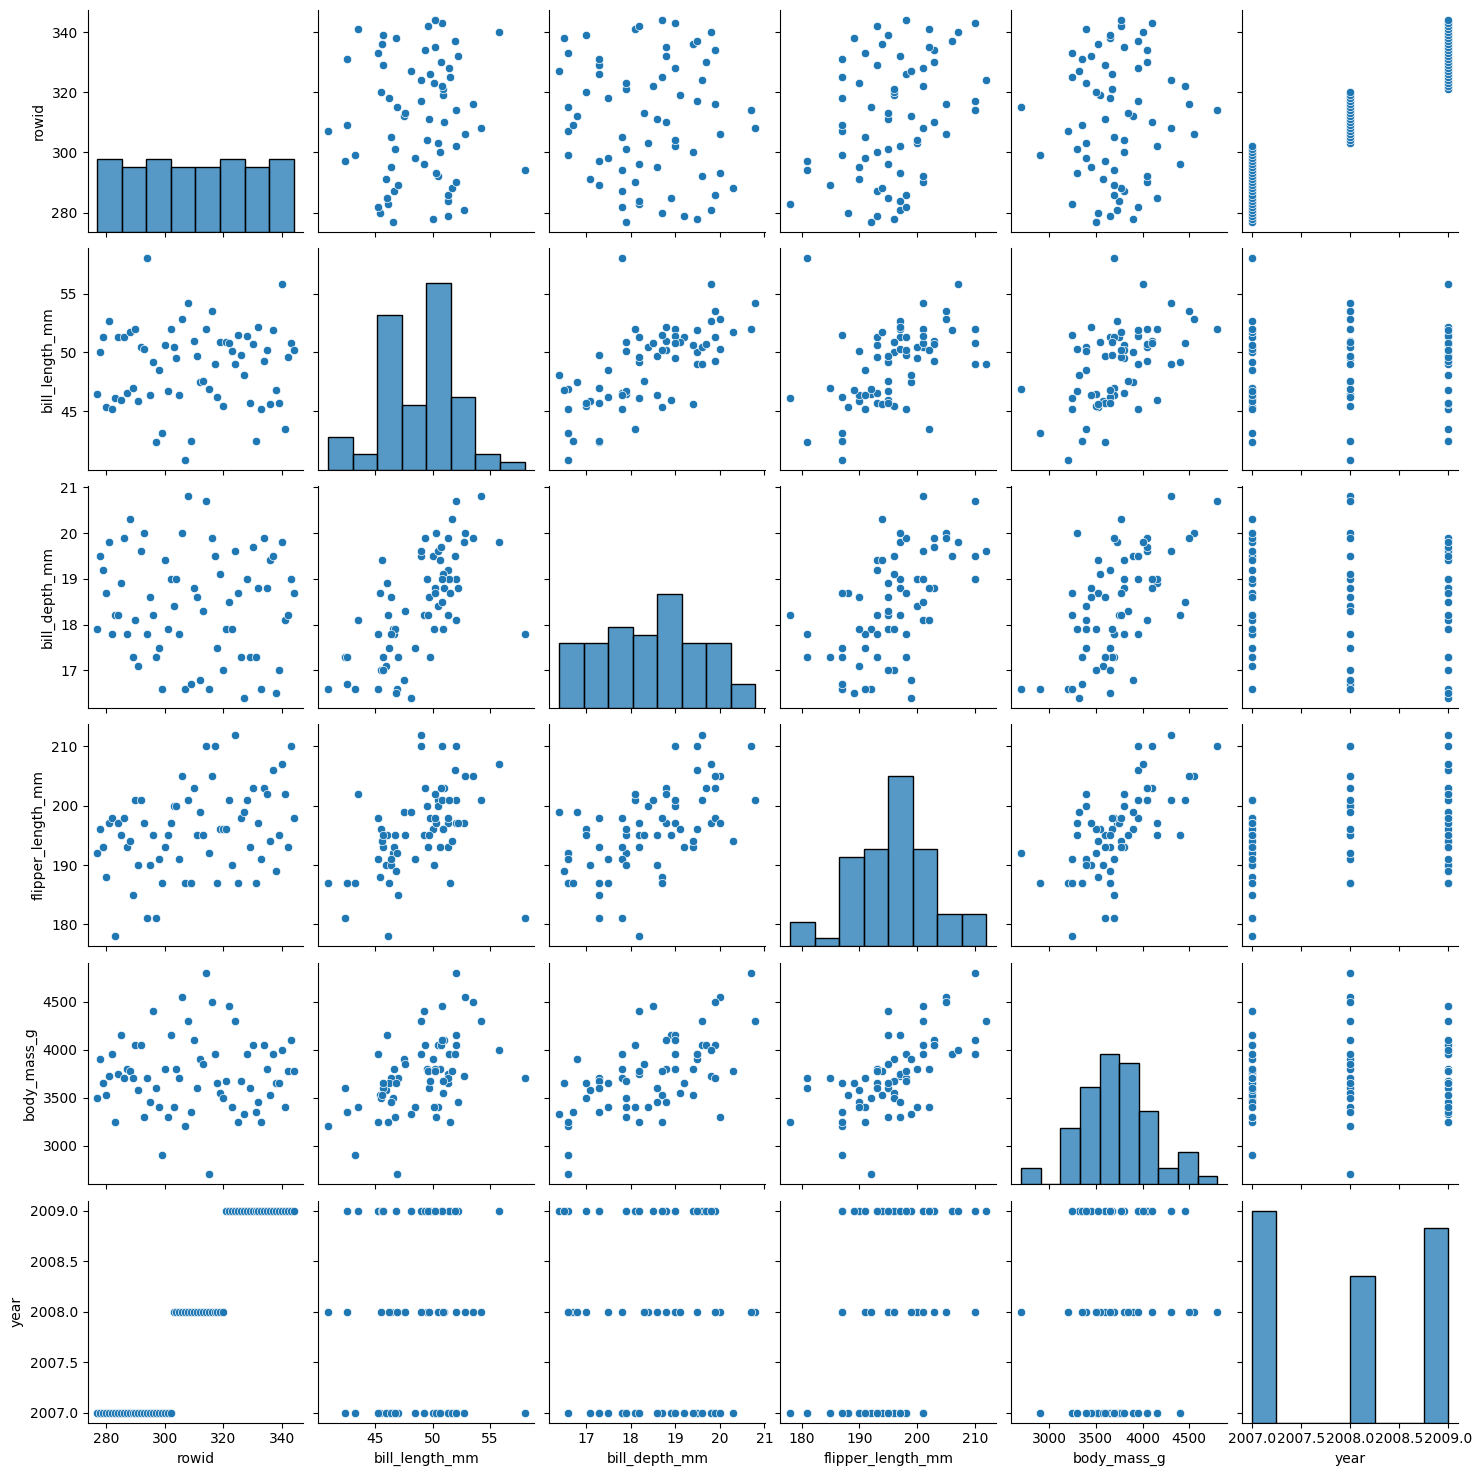

In [25]:
sns.pairplot(subset)

In [12]:
subset.reset_index(inplace=True, drop=True)
subset

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,277,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007
1,278,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007
2,279,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male,2007
3,280,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007
4,281,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007
...,...,...,...,...,...,...,...,...,...
63,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
64,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
65,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
66,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## modelling data for model ols

In [14]:
olsdata=subset[['bill_depth_mm','flipper_length_mm']]
olsdata

,bill_depth_mm,flipper_length_mm
0,17.9,192.0
1,19.5,196.0
2,19.2,193.0
3,18.7,188.0
4,19.8,197.0
...,...,...
63,19.8,207.0
64,18.1,202.0
65,18.2,193.0
66,19.0,210.0


## formula  (Y ~ X)

In [16]:
olsf= "flipper_length_mm ~ bill_depth_mm"

## constructing model

In [20]:
from statsmodels.formula.api import ols

In [24]:
obj = ols(formula =olsf, data=olsdata)
model=obj.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.48
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           2.16e-07
Time:                        14:37:08   Log-Likelihood:                -215.62
No. Observations:                  68   AIC:                             435.2
Df Residuals:                      66   BIC:                             439.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       128.6967     11.623     11.073      0.000     105.492     151.902
bill_depth_mm     3.6441      0.630      5.786      0.000       2.387       4.902
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.837
Skew:                          -0.255   Prob(JB):                        0.658
Kurtosis:                       3.190   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## seeing models prediction

In [31]:
Xval=olsdata['bill_depth_mm']
fittedval=model.predict(Xval)
fittedval

0     193.926443
1     199.757037
2     198.663801
3     196.841740
4     200.850273
         ...    
63    200.850273
64    194.655267
65    195.019679
66    197.934976
67    196.841740
Length: 68, dtype: float64

In [34]:
Yval=olsdata['flipper_length_mm']
Yval

0     192.0
1     196.0
2     193.0
3     188.0
4     197.0
      ...  
63    207.0
64    202.0
65    193.0
66    210.0
67    198.0
Name: flipper_length_mm, Length: 68, dtype: float64

In [48]:
df=pd.concat([fittedval,Yval], axis=1)
df



,0,flipper_length_mm
0,193.926443,192.0
1,199.757037,196.0
2,198.663801,193.0
3,196.841740,188.0
4,200.850273,197.0
...,...,...
63,200.850273,207.0
64,194.655267,202.0
65,195.019679,193.0
66,197.934976,210.0


In [50]:
df.columns=['predicted_val', 'observed_val']
df

,predicted_val,observed_val
0,193.926443,192.0
1,199.757037,196.0
2,198.663801,193.0
3,196.841740,188.0
4,200.850273,197.0
...,...,...
63,200.850273,207.0
64,194.655267,202.0
65,195.019679,193.0
66,197.934976,210.0


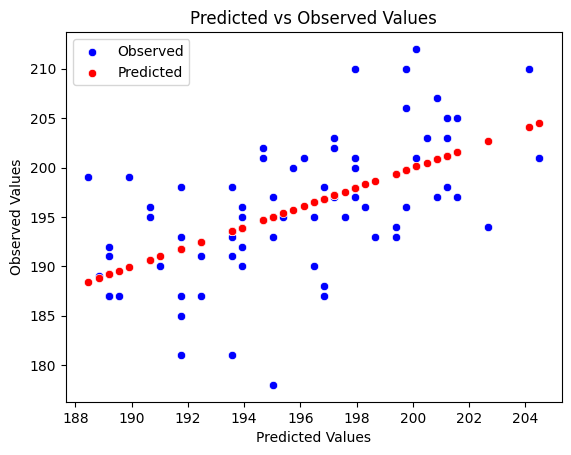

In [58]:
sns.scatterplot(x='predicted_val', y='observed_val', data=df, color='blue', label='Observed')
sns.scatterplot(x='predicted_val', y='predicted_val', data=df, color='red', label='Predicted')

plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Predicted vs Observed Values')
plt.legend()
plt.show()

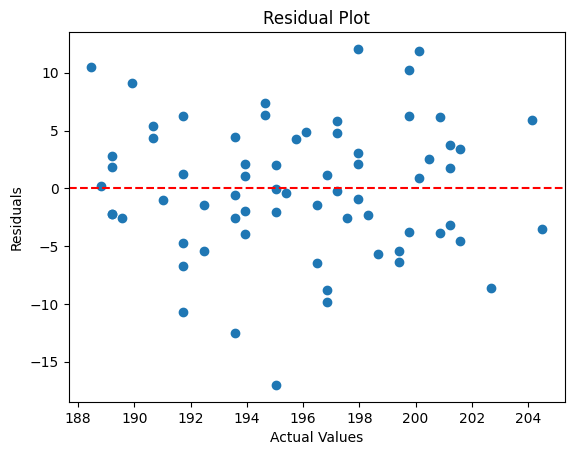

In [61]:
plt.scatter(df['predicted_val'], df['observed_val'] - df['predicted_val'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

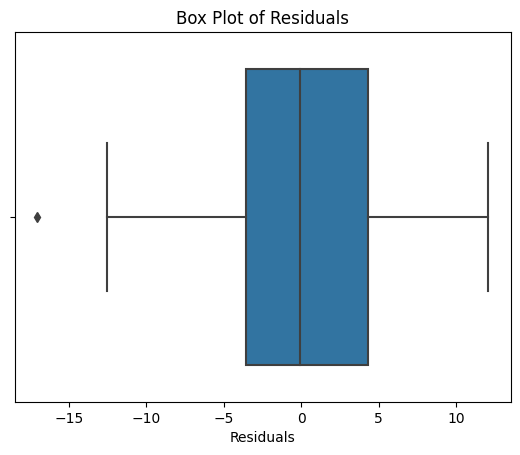

In [62]:
sns.boxplot(x=df['observed_val'] - df['predicted_val'])
plt.xlabel('Residuals')
plt.title('Box Plot of Residuals')
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(df['observed_val'], df['predicted_val']))
print("Mean Squared Error:", mean_squared_error(df['observed_val'], df['predicted_val']))
print("R-squared:", r2_score(df['observed_val'], df['predicted_val']))


Mean Absolute Error: 4.5808383347481945
Mean Squared Error: 33.24861525475262
R-squared: 0.3365657604430209


## plots of model data

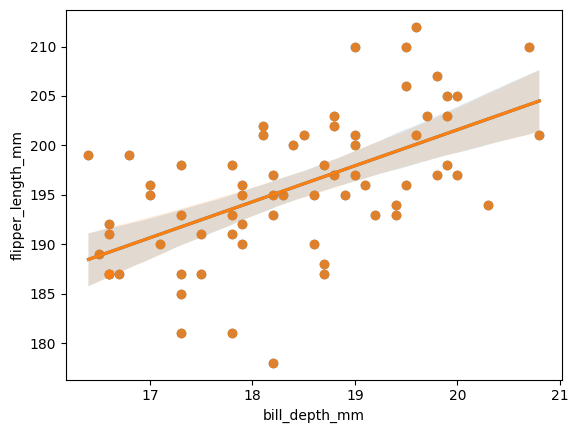

In [66]:
sns.regplot(x='bill_depth_mm',y='flipper_length_mm', data=olsdata)
plt.show()

### Checking the normality assumption

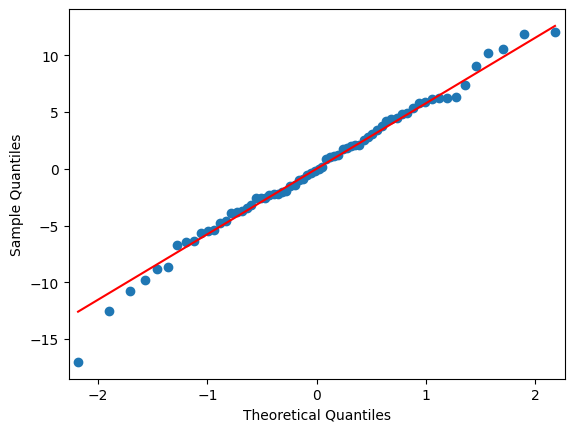

In [69]:
import statsmodels.api
fig = statsmodels.api.qqplot(model.resid, line = 's')
plt.show()

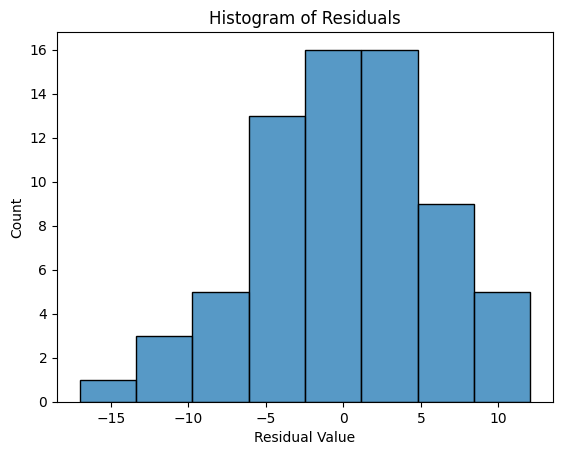

In [71]:
import matplotlib.pyplot as plt
fig = sns.histplot(model.resid)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

### Check the homoscedasticity assumption

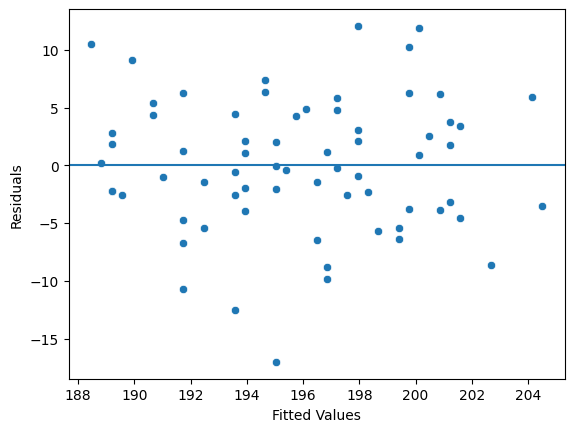

In [74]:
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=df['predicted_val'], y=model.resid)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()